<a href="https://colab.research.google.com/github/Lufuno1994/Lufuno1994/blob/main/Negogogo_LP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Problem Statement**

Predicts the total ride duration of taxi trip in New York City.

# **Hypothesis Generation**
* Start DateTime: Weekends tend to have the lesser trip duration due to less congestion.
* Pickup and Dropoff Location: Distance between locations.
* Weather: conditions such as precipitation or extreme heat, may affect the duration of taxi trips in New York City. Trips taken during inclement weather may take longer due to traffic or road closures.
* Traffic: As traffic congestion increases, the duration of taxi trips will also increase. This could be due to factors such as slower speeds, longer wait times at traffic lights or stop signs, or increased congestion on highways or main roads.

# **Data Collection**
* Trip
* Traffic and Geographic information
* Weather

# **Load Libraries**

In [2]:
import pandas as pd       #data processing
import numpy as np        #linear algebra
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings; warnings.simplefilter('ignore')


# **Load Dataset**

In [4]:
#import the data from a csv file.
data = pd.read_csv("/content/nyc_taxi_trip_duration.csv")

# **File structure and content & Data Types**

In [37]:
#First 5 rows of the dataset
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400.0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100.0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635.0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141.0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848.0


In [15]:
#Shape of the dataset
data.shape

(15667, 11)

In [8]:
#Columns of the dataset
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
#Datatypes of all these columns
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


*   We have id, pickup_datetime, dropoff_datetime, and store_and_fwd_flag of the type ‘object’.
*   vendor_id, passenger_count are of type int.
*   pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, and trip_duration are of type float.




In [ ]:
#Detect the missing values
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
#Checking for unique values of all columns
data.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

*   We see that id has 618775 unique values which are equal to the number of rows in our dataset.
*   There are 2 unique vendor ids.
*   There are 8 unique passenger counts.
*   There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.

In [ ]:
#Target Exploration(count ,mean, std, min, 25%, 50%, 75%,& max)
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


Some insights from the above summary:

* Vendor id has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.
* Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.

**Log trip_duration and plot your result as probability density function.**



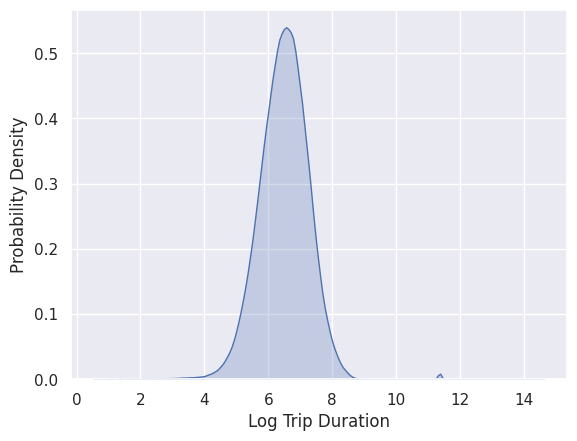

In [ ]:
#Log the trip_duration using the NumPy log function
data['log_trip_duration'] = np.log(data['trip_duration'].values + 1)

#Plot the probability density function using Seaborn's kdeplot function
sns.kdeplot(data['log_trip_duration'], shade=True)
plt.xlabel('Log Trip Duration')
plt.ylabel('Probability Density')
plt.show()

**Reformatting features & Checking consistency(1. converting strings to datetime features, 2. Converting yes/no flag to 1 and 0**

In [5]:
#Convert strings to datetime format
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [6]:
#Converting yes/no flag to 1 and 0
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

In [7]:
#Extracting and creating new features from this datetime features created above
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour
data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [8]:
#Defining a function that allow determine what time of the day the ride was taken.
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [9]:
#Applying this function and create new columns in the dataset.
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday']=data['dropoff_hour'].apply(time_of_day)

In [ ]:
#Re-run the data to see what the head looks like now with these new features.
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,...,Monday,Monday,0,0,16,16,2,2,Evening,Evening
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,...,Friday,Friday,4,4,23,23,3,3,Late night,Late night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,...,Sunday,Sunday,6,6,17,18,2,2,Evening,Evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,...,Tuesday,Tuesday,1,1,9,10,1,1,Morning,Morning
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,...,Wednesday,Wednesday,2,2,6,6,2,2,Morning,Morning


# **Univariate Analysis**

**Vendor id**

Text(0, 0.5, 'Frequency')

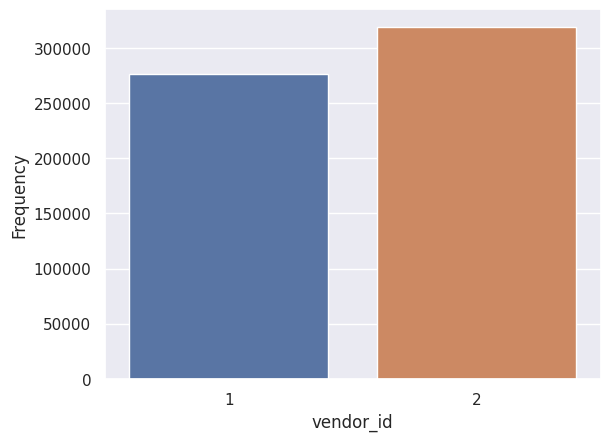

In [28]:
sns.countplot(x='vendor_id',data=data)
plt.ylabel('Frequency')

There is not much difference between the trips taken by both vendors.

**Passenger Count**

Text(0, 0.5, 'Frequency')

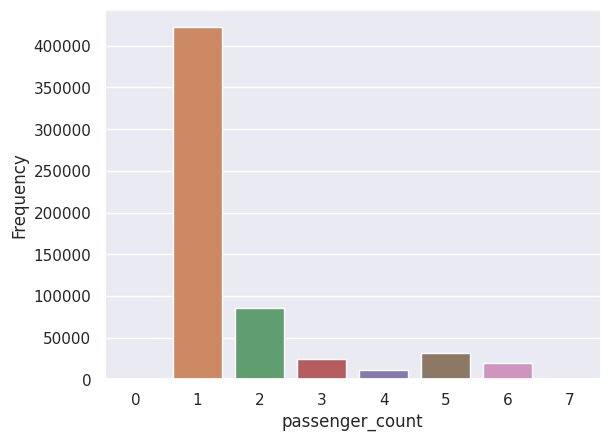

In [27]:
sns.countplot(x='passenger_count', data=data)
plt.ylabel('Frequency')

The highest amount of trips are with 1 passenger.

**Store and Forward Flag**

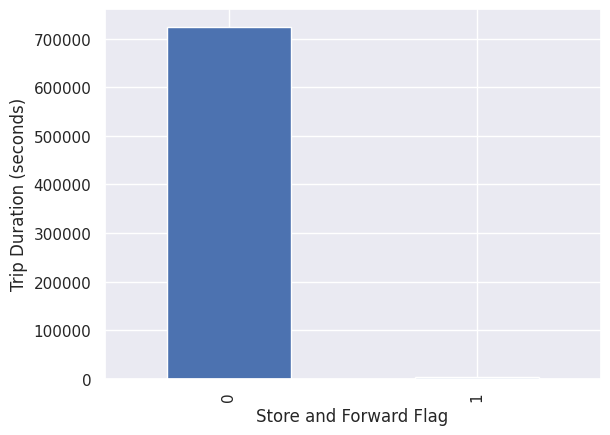

In [33]:
# Extract the necessary columns
pickup_datetime = pd.to_datetime(data["pickup_datetime"])
dropoff_datetime = pd.to_datetime(data["dropoff_datetime"])
store_and_fwd_flag = data["store_and_fwd_flag"]

#Converting yes/no flag to 1 and 0
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

# Create a new column for trip duration
data["trip_duration"] = (dropoff_datetime - pickup_datetime).dt.total_seconds()

# Plot the store and forward flag
store_fwd_counts = data['store_and_fwd_flag'].value_counts()
store_fwd_counts.plot(kind='bar')
plt.ylabel("Trip Duration (seconds)")
plt.xlabel("Store and Forward Flag")
plt.show()

There are less than 1% of trips that were stored before forwarding.

**Finding pickup time in week days and hour and ploting them again total number of pickup per month.**

Text(0, 0.5, 'Frequency')

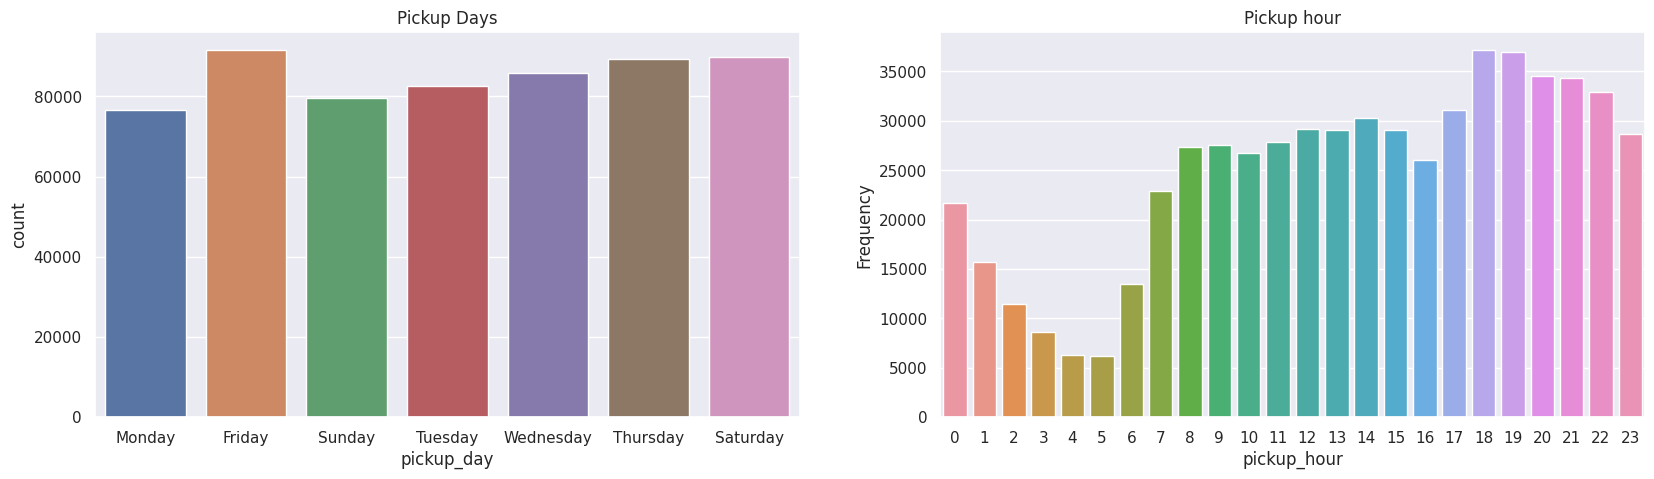

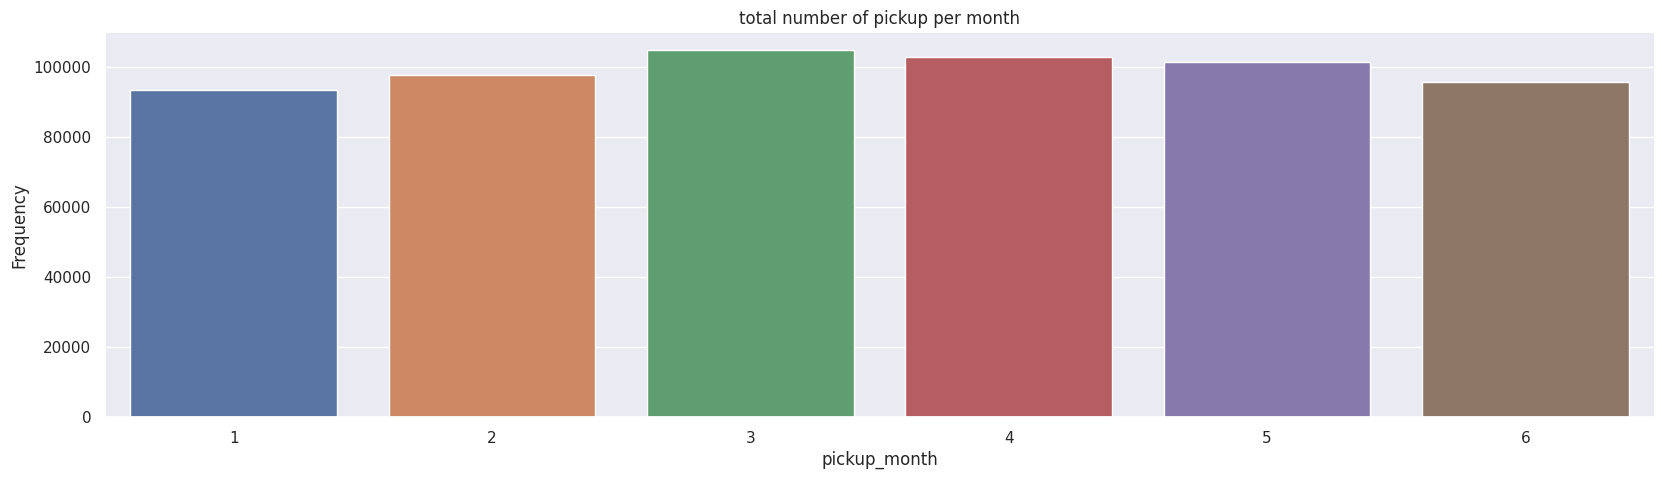

In [41]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=data,ax=ax1)
plt.ylabel('Frequency')
ax2.set_title('Pickup hour')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax2)
plt.ylabel('Frequency')

#total number of pickup per month.
figure,(ax3)=plt.subplots(ncols=1,figsize=(20,5))
ax3.set_title('total number of pickup per month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax3)
plt.ylabel('Frequency')

Fridays are the busiest days followed by Saturdays, probably because it’s weekend And the busiest hours are 6:00 pm to 7:00 pm, And Month 3(March) is the busiest.

**Latitude & Longitude-Do distribution plots on pickup and drop-off latitude and longitude.**

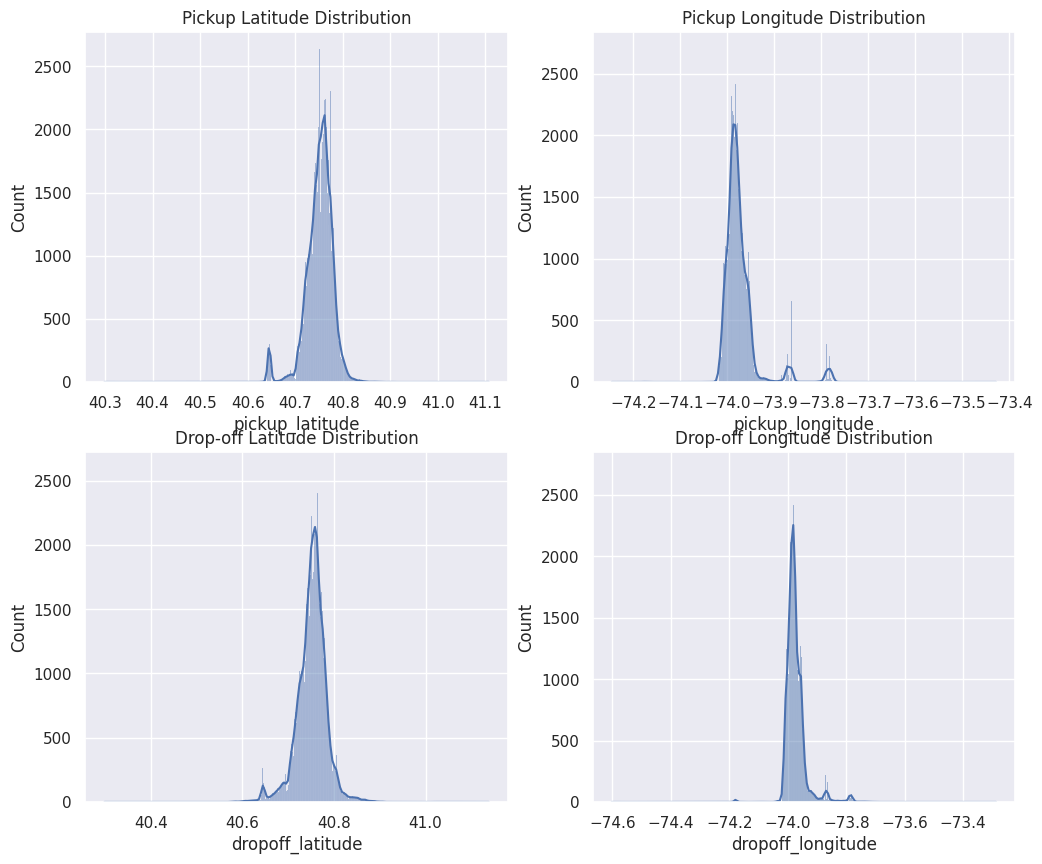

In [8]:
# Create a figure with subplots for each variable
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))

# Create distribution plots for the pickup latitude and longitude
sns.histplot(data=data, x="pickup_latitude", kde=True, ax=axs[0][0])
sns.histplot(data=data, x="pickup_longitude", kde=True, ax=axs[0][1])

# Create distribution plots for the drop-off latitude and longitude
sns.histplot(data=data, x="dropoff_latitude", kde=True, ax=axs[1][0])
sns.histplot(data=data, x="dropoff_longitude", kde=True, ax=axs[1][1])

# Set the titles for each subplot
axs[0][0].set_title("Pickup Latitude Distribution")
axs[0][1].set_title("Pickup Longitude Distribution")
axs[1][0].set_title("Drop-off Latitude Distribution")
axs[1][1].set_title("Drop-off Longitude Distribution")

# Display the plots
plt.show()

# **Bivariate Analysis**

<AxesSubplot: xlabel='pickup_day', ylabel='trip_duration'>

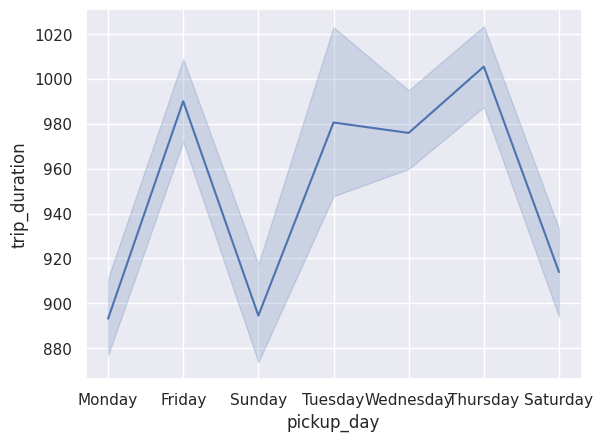

In [ ]:
#Trip Duration per Day of the Week
sns.lineplot(x='pickup_day',y='trip_duration',data=data)

* Trip duration is the longest on Thursdays closely followed by Fridays.
* Trip duration is in seconds

<AxesSubplot: xlabel='pickup_hour', ylabel='trip_duration'>

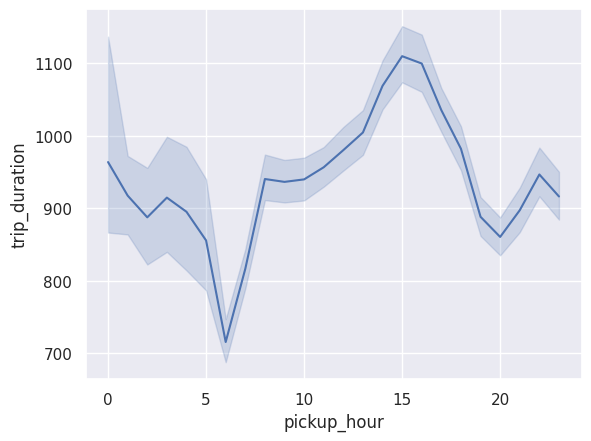

In [ ]:
#Trip Duration per hour of the week
sns.lineplot(x='pickup_hour',y='trip_duration',data=data)


Trip duration is at the maximum around 3pm/4pm which may be because of traffic on the roads and at its lowest around 6am as streets may not be busy.

<AxesSubplot: xlabel='vendor_id', ylabel='trip_duration'>

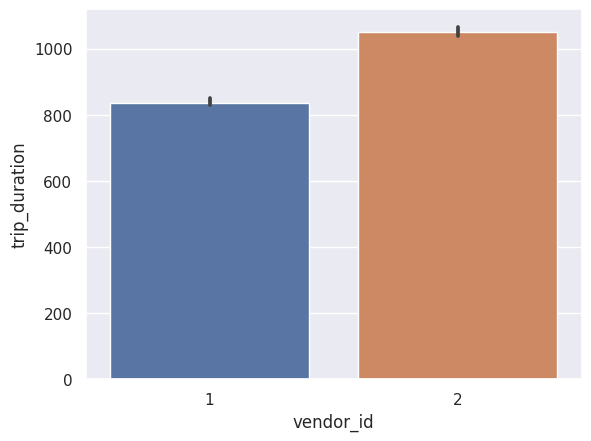

In [ ]:
#Trip Duration per Vendor
sns.barplot(y='trip_duration',x='vendor_id',data=data,estimator=np.mean)

Vendor id 2 takes longer trips as compared to vendor 1. The Average trip duration for vendor 2 is higher than vendor 1 by approximately 200 seconds i.e. atleast 3 minutes per trip.

**Finding Median Trip Duration Vendor Wise and plot**

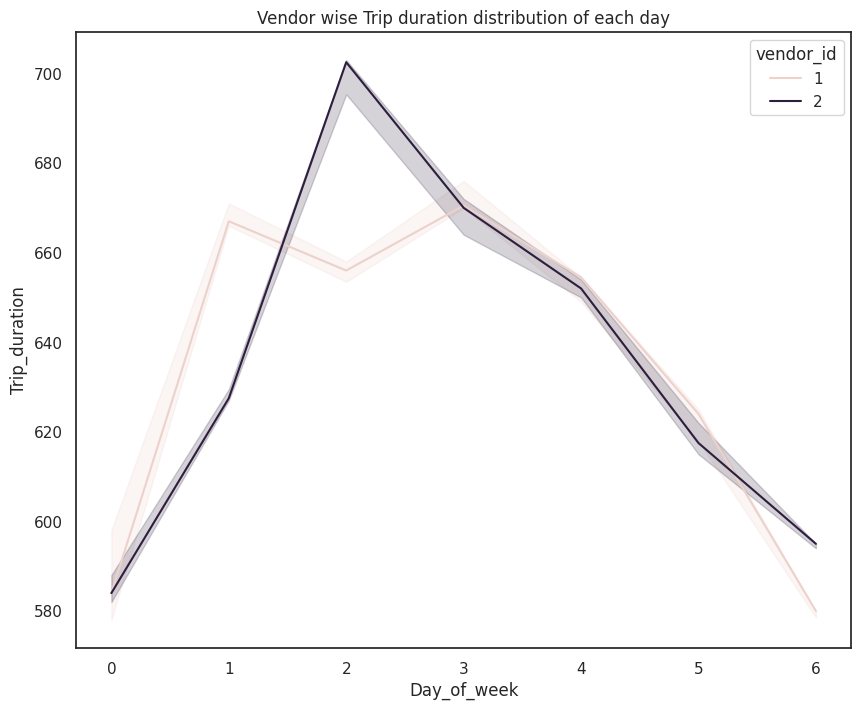

In [41]:
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize=(10,8))
sns.lineplot(data=data[data['trip_duration']<=data['trip_duration'].quantile(0.95)],x='pickup_day_no', y='trip_duration', hue='vendor_id',ci=10, estimator=np.median)
plt.xlabel('Day_of_week')
plt.ylabel('Trip_duration')
plt.title('Vendor wise Trip duration distribution of each day');

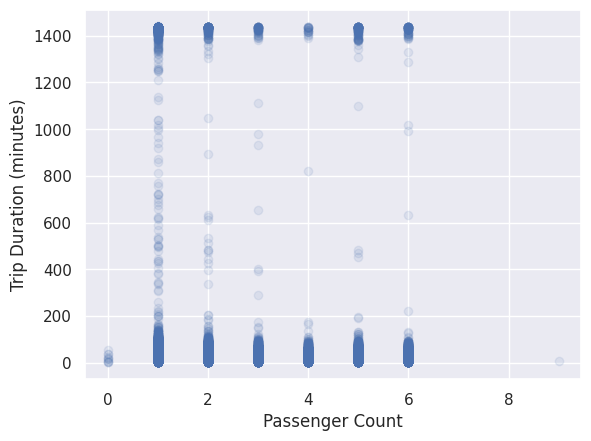

In [ ]:
#Remove any rows with missing values
data.dropna(inplace=True)

# Create a new column for the trip duration in minutes
data['trip_duration_minutes'] = (data['dropoff_datetime'] - data['pickup_datetime']).dt.total_seconds() / 60

# Remove any rows with trip durations less than 1 minute or greater than 24 hours
data = data[(data['trip_duration_minutes'] >= 1) & (data['trip_duration_minutes'] <= 1440)]

# Plot the trip duration vs passenger count using a scatter plot
plt.scatter(data['passenger_count'], data['trip_duration_minutes'], alpha=0.1)
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration (minutes)')
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement mpl_toolkits.basemap (from versions: none)
ERROR: No matching distribution found for mpl_toolkits.basemap
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


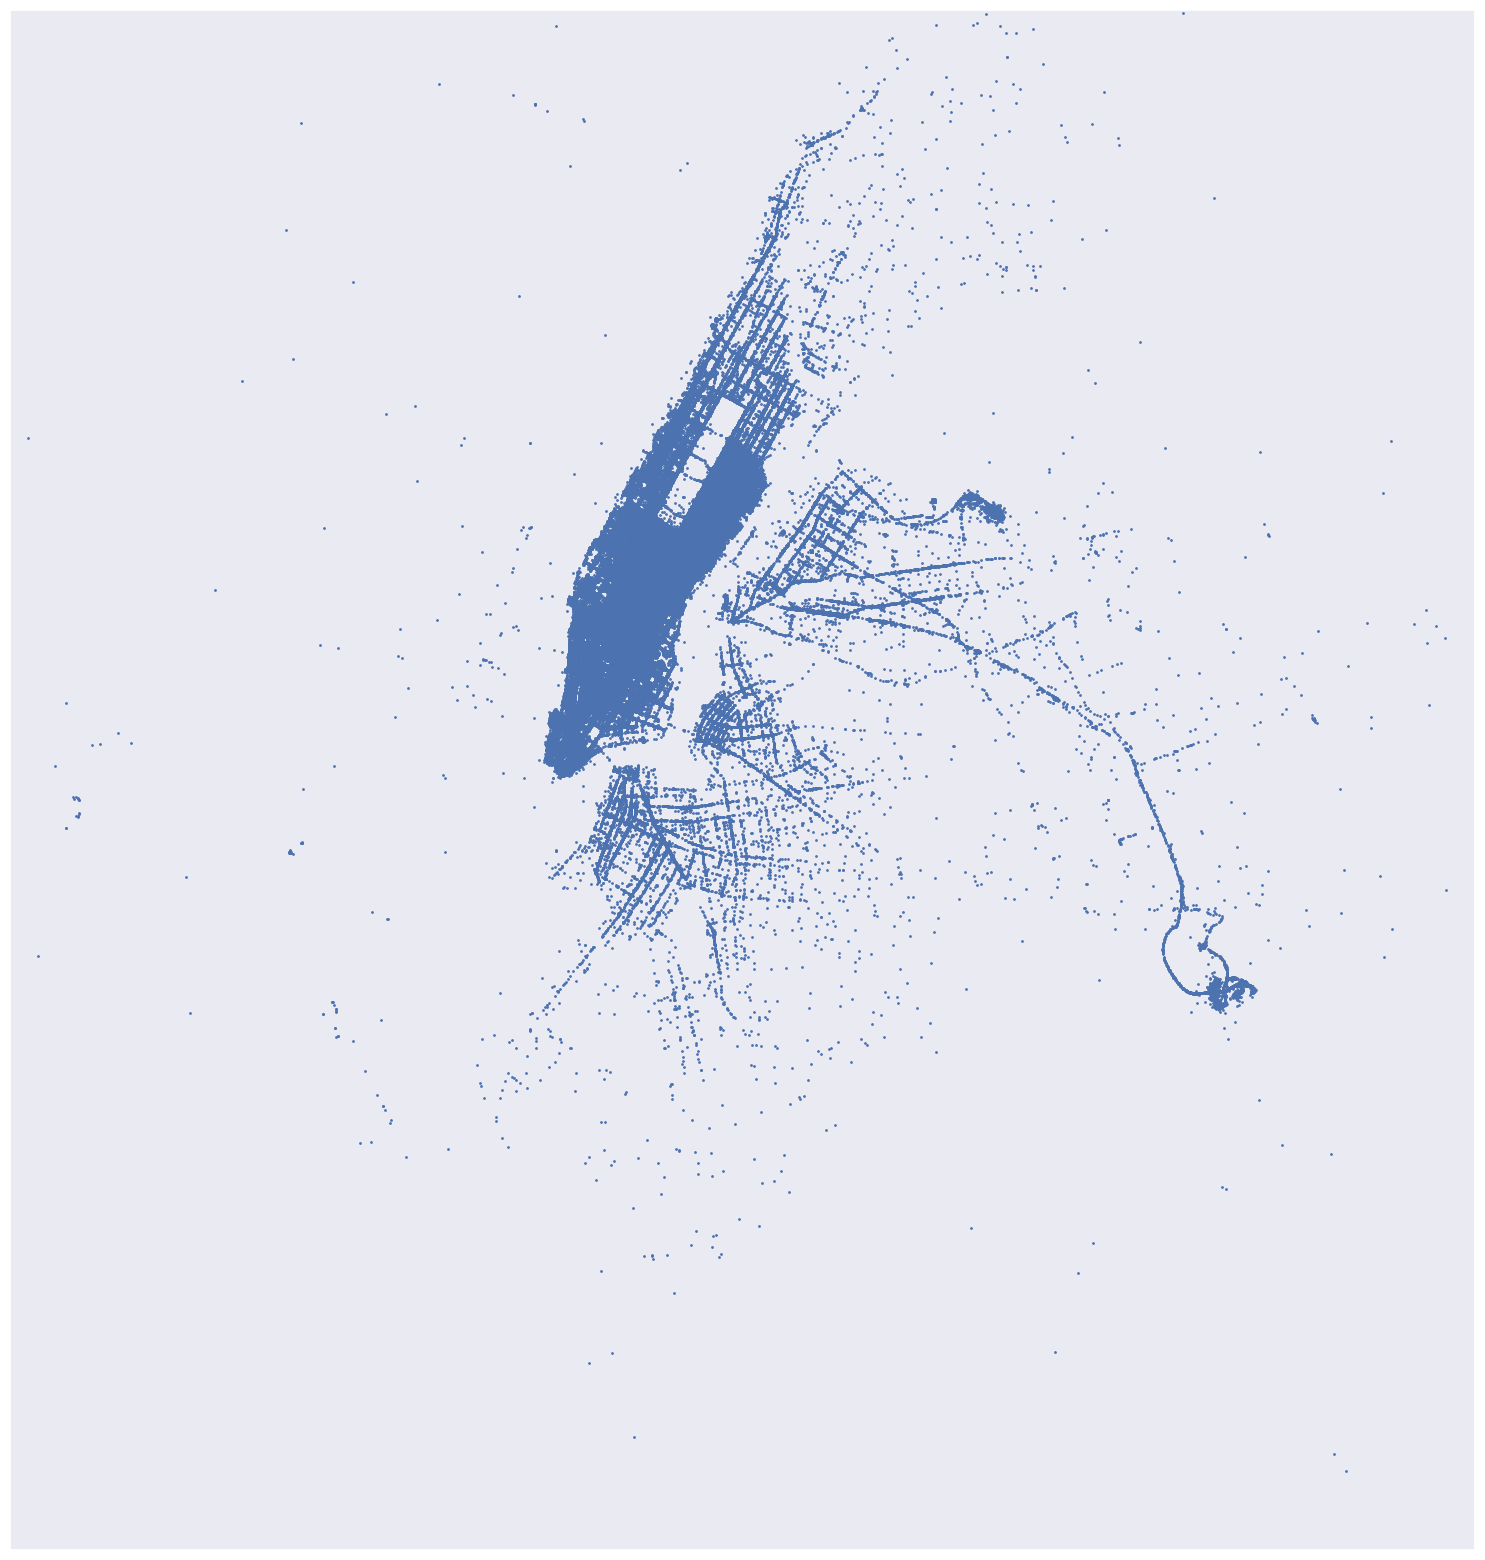

In [ ]:
!pip install mpl_toolkits.basemap
!pip install Basemap
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(20,20))
# Set the limits of the map to the minimum and maximum coordinates
lat_min = 40.5
lat_max = 40.9
lon_min = -74.2
lon_max = -73.7

# Set the center of the map
cent_lat = (lat_min + lat_max) / 2
cent_lon = (lon_min + lon_max) / 2

#Create the Basemap object with required params.
map = Basemap(llcrnrlon=lon_min,
              llcrnrlat=lat_min,
              urcrnrlon=lon_max,
              urcrnrlat=lat_max,
              resolution='l',
              projection='tmerc',
              lat_0 = cent_lat,
              lon_0 = cent_lon)

#Style the map
# map.drawcounties()
#Fetch the longitude and latitude in form of array
long = np.array(data["pickup_longitude"])
lat = np.array(data["pickup_latitude"])

x, y = map(long, lat)
map.plot(x, y,'bo', markersize=1, alpha=1)
plt.xticks()
plt.show()

# **Correlation Heatmap**

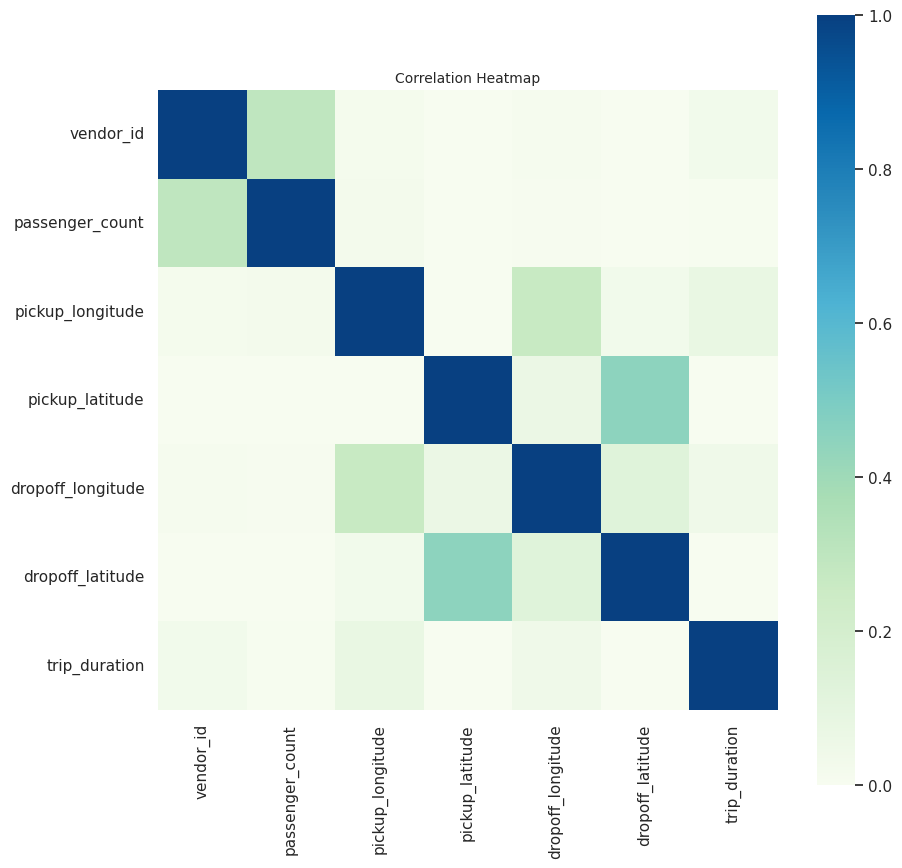

In [27]:
plt.figure(figsize=(10,10))
corr = pd.DataFrame(data).corr()
corr.index = pd.DataFrame(corr).columns
sns.heatmap(corr, cmap='GnBu', vmin=0, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=10)
plt.show()

In [ ]:
data = data.drop(columns=["passenger_count", "pickup_day_no", "dropoff_day_no", "pickup_hour", "dropoff_hour", "pickup_month","dropoff_month"])

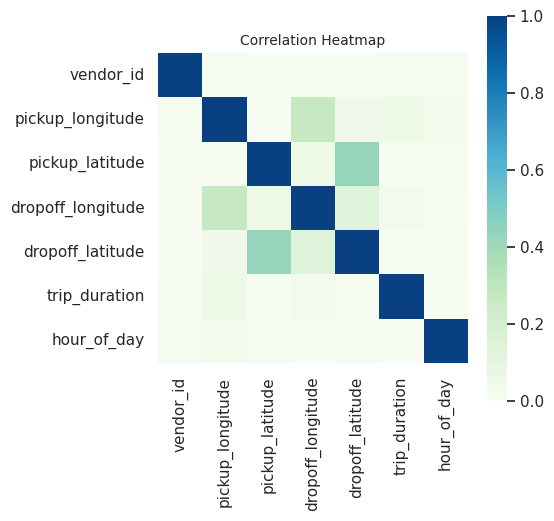

In [24]:
# Extract the day of the week from the pickup datetime column
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['hour_of_day'] = data['pickup_datetime'].dt.hour
data['day_of_week'] = data['pickup_datetime'].dt.day_name()

#data = data.drop(columns=["passenger_count"])
plt.figure(figsize=(5,5))
corr = data[["hour_of_day", "day_of_week"]].corr()
corr = pd.DataFrame(data).corr()
corr.index = pd.DataFrame(corr).columns
sns.heatmap(corr, cmap='GnBu', vmin=0, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=10)
plt.show()
